# OpenCV transformations
In this notebook we apply a number of transformations to images.

## Imports
Includes our own libraries

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image

## Download images
You might be able to skip this if you already have the images from a previous run...

In [4]:
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P ./tmp/
# !tar -xf ./tmp/wiki.tar.gz -C ./tmp/

## Resizing/Scaling images
`cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)`

- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fast
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

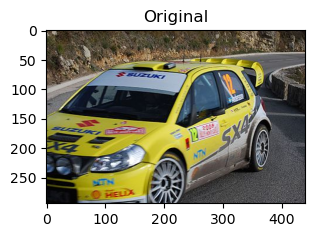

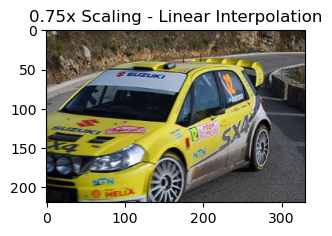

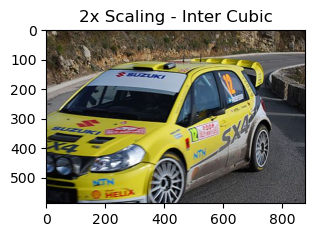

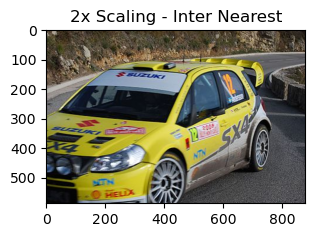

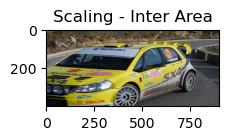

In [8]:
img = cv2.imread('tmp/wiki/04/11720204_1980-03-10_2008.jpg')
show_image(img, "Original")

img_scaled = cv2.resize(img, None, fx=0.75, fy=0.75)
show_image(img_scaled, "0.75x Scaling - Linear Interpolation")

img_scaled_2 = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
show_image(img_scaled_2, "2x Scaling - Inter Cubic")

img_scaled_3 = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
show_image(img_scaled_3, "2x Scaling - Inter Nearest", )

img_scaled_4 = cv2.resize(img, (900, 400), interpolation = cv2.INTER_AREA)
show_image(img_scaled_4, "Scaling skewed - Inter Area")

## Down- Upsample image with image pyramids
`cv2.pyrUp(image)`, `cv2.pyrDown(image)`

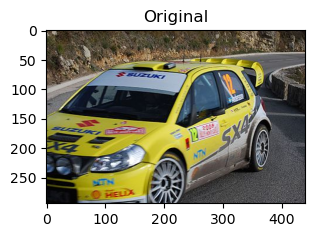

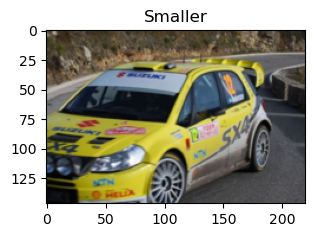

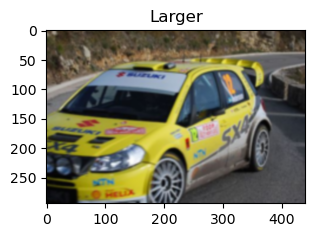

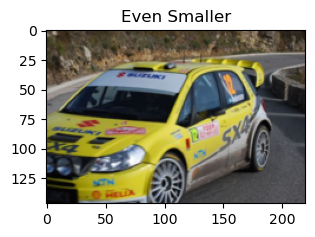

In [10]:
smaller = cv2.pyrDown(img)
larger = cv2.pyrUp(smaller)

show_image(img, "Original")
show_image(smaller, 'Smaller')
show_image(larger, 'Larger')

even_smaller = cv2.pyrDown(smaller)
show_image(smaller, 'Even Smaller')

## Cropping
We can crop an image by simply manipulating the image matrix with numpy.

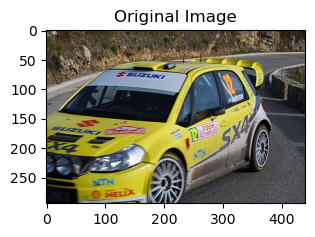

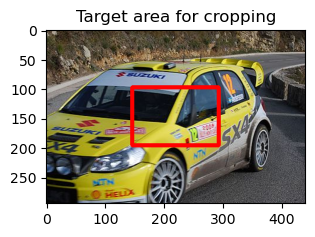

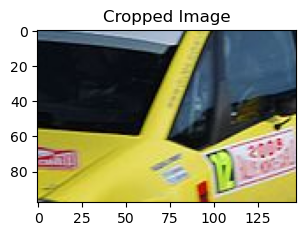

In [15]:
h, w = img.shape[:2]

# top left coordinates of cropping target 1/3, 1/3
start_row, start_col = int(h * (1/3)), int(w * (1/3))

# bottom right coordinates
end_row, end_col = int(h * (2/3)), int(w * (2/3))

cropped = img[start_row:end_row , start_col:end_col]

show_image(img, "Original Image")

# draw target cropping rectangle
copy = img.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,0,255), 6)

show_image(copy, "Target area for cropping")

show_image(cropped, "Cropped Image") 

## Translations
Affine transform to shift image position.  
`cv2.warpAffine(image, T, (width, height))`

[[  1.    0.  110. ]
 [  0.    1.   73.5]]


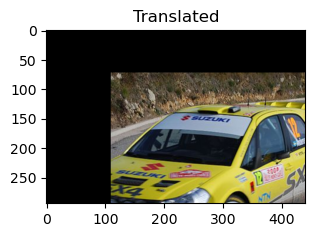

In [18]:
# shift image by quarter of the height and width
quarter_height, quarter_width = h/4, w/4

# translation matrix
#       | 1 0 Tx |
#  T  = | 0 1 Ty |
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])
print(T)

img_translation = cv2.warpAffine(img, T, (w, h))
show_image(img_translation, "Translated")

## Rotations
`cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle, scale)`

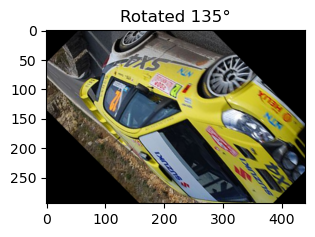

In [21]:
T = cv2.getRotationMatrix2D((w/2, h/2), 135, 1)
rotated = cv2.warpAffine(img, T, (w, h))
show_image(rotated, "Rotated 135°")

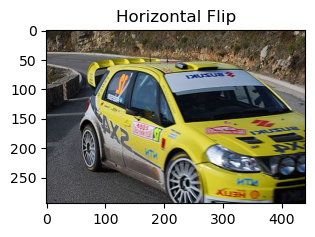

In [22]:
flipped = cv2.flip(img, 1)
show_image(flipped, "Horizontal Flip")